In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('Data_modified.csv')
ac_data=data.values
df=data[0:1215]

In [5]:
y=df.ugbu_chassis_resources_cpu_usage

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(972, 6) (972L,)
(243, 6) (243L,)


In [8]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions)

[0.00129003 0.00379147 0.00189593 0.01127714 0.0053161  0.01016333
 0.00093818 0.00629322 0.000645   0.0001759  0.0037721  0.00189554
 0.00156356 0.00375267 0.00130954 0.01047659 0.00625434 0.0027363
 0.02011111 0.01020255 0.00130951 0.00257997 0.01256749 0.00535551
 0.0150498  0.00187628 0.01063236 0.00570726 0.0057072  0.00031271
 0.01020205 0.00566815 0.00140729 0.00506234 0.00080138 0.00187639
 0.01141419 0.0050816  0.00375272 0.0006841  0.0014268  0.01129727
 0.00189597 0.00377089 0.00129001 0.01133531 0.00510111 0.00019546
 0.01024083 0.00504261 0.00627414 0.00158312 0.00128998 0.00312711
 0.00517912 0.00035179 0.01063259 0.01127724 0.0013094  0.0031466
 0.00128995 0.0114144  0.00191542 0.00752441 0.00562854 0.00187618
 0.0106323  0.00129003 0.00140725 0.0050818  0.01067205 0.00539432
 0.00752481 0.00127049 0.00377229 0.01039827 0.00066455 0.00627366
 0.00046908 0.00627356 0.00252132 0.02016976 0.00250182 0.01522556
 0.01018283 0.00265818 0.00645    0.00375277 0.00517974 0.005101

Text(0,0.5,'Prediction Values')

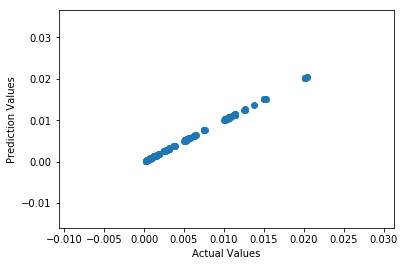

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Prediction Values")

[[1.54400406e+09 1.00000000e+00 3.79000000e+02 3.60000000e+01
  3.55783360e+07]
 [1.54400412e+09 1.00000000e+00 4.03000000e+02 3.60000000e+01
  4.32070400e+07]
 [1.54400418e+09 1.00000000e+00 4.27000000e+02 3.60000000e+01
  3.54701360e+07]
 ...
 [1.54407690e+09 1.00000000e+00 3.63000000e+02 3.50000000e+01
  4.25890800e+07]
 [1.54407696e+09 1.00000000e+00 3.87000000e+02 3.50000000e+01
  3.52732080e+07]
 [1.54407702e+09 1.00000000e+00 4.11000000e+02 3.50000000e+01
  4.30118720e+07]]


In [29]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('NB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))

results=[]
algo_names=[]

In [33]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
df=data[0:1215]
kmeans.fit(df)    
    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
kmeans.cluster_centers_

array([[1.54404052e+09, 1.00000000e+00, 1.43490198e+04, 3.59785832e+01,
        3.85027526e+07, 4.87646902e-03],
       [1.54404044e+09, 1.00000000e+00, 1.46549539e+04, 3.59917763e+01,
        4.62152864e+07, 4.75504245e-03]])

In [35]:
def converter(cluster):
    if cluster > 0.024013:
        return 2
    if cluster > 0.004816:
        return 1
    else:
        return 0

In [36]:
df['Cluster'] = df['ugbu_chassis_resources_cpu_usage'].apply(converter)
df.head(5)

C:\Users\abhinjha\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Time,envoy_server_live,envoy_http_rq_total,jvm_threads_current,jvm_memory_bytes_used,ugbu_chassis_resources_cpu_usage,Cluster
0,1544004060,1,379,36,35578336,0.002521,0
1,1544004120,1,403,36,43207040,0.005356,1
2,1544004180,1,427,36,35470136,0.010789,1
3,1544004240,1,449,36,42478088,0.002678,0
4,1544004300,1,449,36,42478088,0.002678,0


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[347 358   0]
 [259 250   0]
 [  1   0   0]]
             precision    recall  f1-score   support

          0       0.57      0.49      0.53       705
          1       0.41      0.49      0.45       509
          2       0.00      0.00      0.00         1

avg / total       0.50      0.49      0.49      1215



C:\Users\abhinjha\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

C:\Users\abhinjha\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
from sklearn.model_selection import cross_val_score
cols_to_use = ['envoy_server_live','envoy_http_rq_total','jvm_threads_current','jvm_memory_bytes_used']
X = df[cols_to_use]
y = df.ugbu_chassis_resources_cpu_usage
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-0.00340563 -0.00386037 -0.00362679]


In [41]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 0.003631


In [42]:
print(classification_report(df['Cluster'],kmeans.labels_))

             precision    recall  f1-score   support

          0       0.57      0.49      0.53       705
          1       0.41      0.49      0.45       509
          2       0.00      0.00      0.00         1

avg / total       0.50      0.49      0.49      1215



In [48]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))

[[347 358   0]
 [259 250   0]
 [  1   0   0]]


In [52]:
acc=float((347+259))/(347+259+358)
error=float((250))/()
ans="%s: %f \n" % ('Accuracy of Model=',acc)
print(ans)

Accuracy of Model=: 0.628631 

